### Machine Learning Foundation
Section 2, Part a: Regression Intro: Transforming Target

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import wget

In [3]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [4]:
import wget
boston = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"
myfile = wget.download(boston)

100% [..............................................................................] 60056 / 60056

### use any of these

In [6]:
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']


In [7]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"
doc = requests.get(url)
with open('razorback.mp3', 'wb') as f:
    f.write(doc.content)

In [6]:
# you can use
#import urllib.request
#url = 'http://www.dsfsfdfggf'
#urllib.request.urlretrieve(url,'file_name_for_save.extension')))

In [8]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Determining Normality
Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:    

. Using a Visual approach     
. Using a Statistical Test       
__Using a Visual approach__  
__Plotting a histogram:__

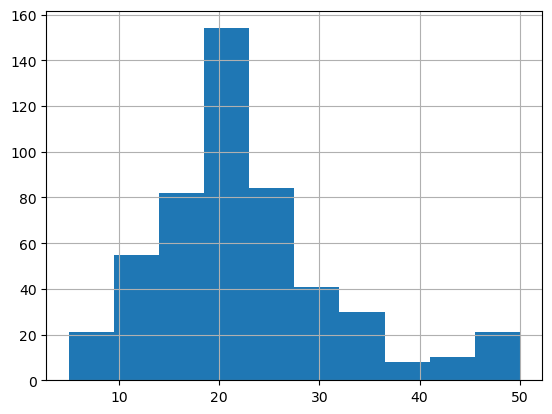

In [9]:
boston_data.MEDV.hist();

The histogram does not look normal due to its right tail.    

__Using a Statistical Test__
Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:  

. This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say:  
   . This test outputs a p-value. The higher this p-value is the closer the distribution is to normal.           
   . Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [11]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [12]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

__Apply transformations to make target variable more normally distributed for Regression__

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable which is the target variable. Let's try some common transformations to try and get y to be normally distributed:

. Log Transformation   
. Square root Transformation   
. Box cox Transformation   

__Log Transformation__     
The log transformation can transform data that is significantly skewed right to be more normally distributed:

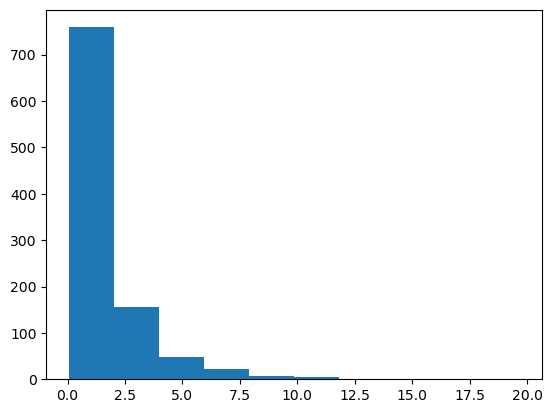

In [14]:
data = plot_exponential_data()

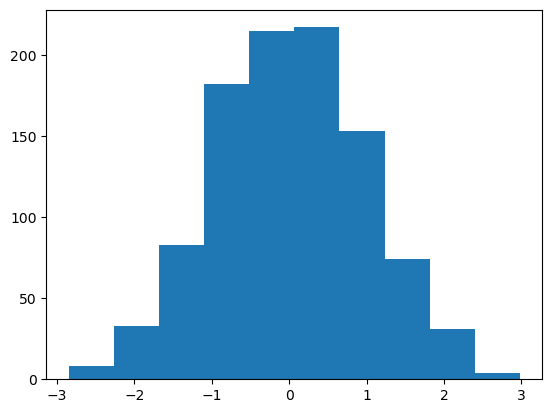

In [15]:
plt.hist(np.log(data));

__Apply transformation to Boston Housing data:__

In [16]:
log_medv = np.log(boston_data.MEDV)

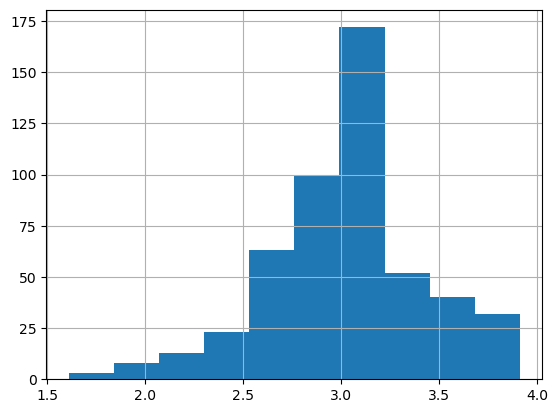

In [17]:
log_medv.hist();

In [18]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

Conclusion: The output is closer to normal distribution, but still not completely normal.

__Square root Transformation__

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

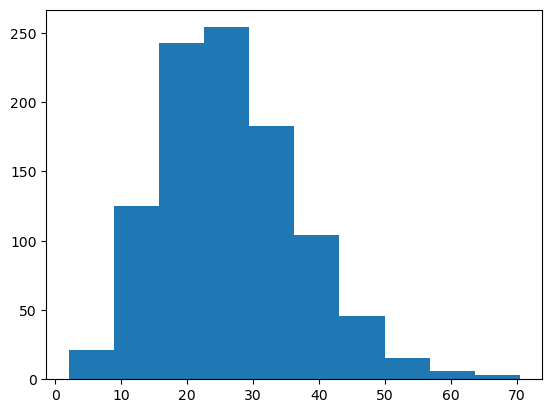

In [19]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.

__Exercise__    
Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

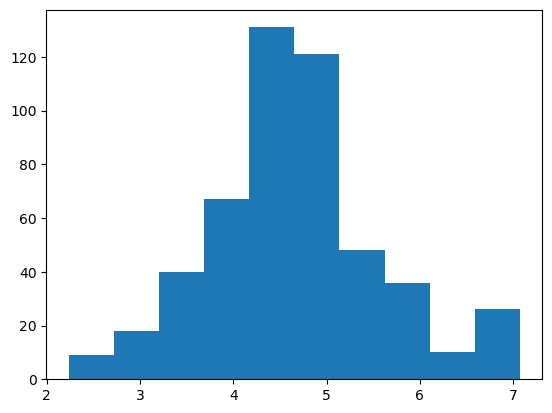

In [20]:
## Enter your code here
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [21]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

__Box cox Transformation__

he box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".     

It is defined as:    

boxcox(𝑦𝑖)=𝑦𝜆𝑖−1𝜆    
 
You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [22]:
from scipy.stats import boxcox

In [23]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [24]:
lam

0.2166209012915364

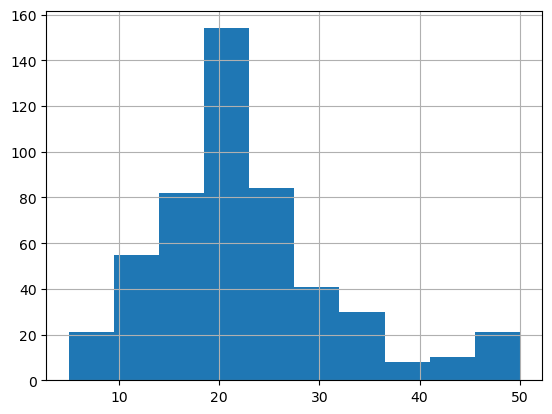

In [25]:
boston_data['MEDV'].hist();

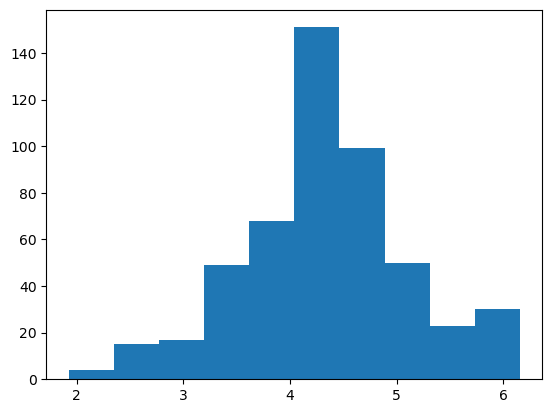

In [26]:
plt.hist(boxcox_medv);

In [27]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.   

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.

### Testing regression:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [29]:
lr = LinearRegression()

In [30]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]


__Create Polynomial Features__

In [31]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

__Split the data into Training and Test Sets__

The split ratio here is 0.7 and 0.3 which means we will assign 70% data for training and 30% data for testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

__Normalize the training data using StandardScaler on X_train. Use fit_transform() function__

In [33]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

__Discuss: what transformation do we need to apply next?__   

Apply the appropriate transformation.

In [34]:
# Enter your code here
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:  

. Fit regression   
. Transform testing data   
. Predict on testing data  

In [35]:
y_train_bc.shape

(354,)

In [36]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

__Discussion__   
. Are we done?   
. What did we predict?   
. How would you interpret these predictions?     
Apply inverse transformations to be able to use these in a Regression context
Every transformation has an inverse transformation. The inverse transformation of  𝑓(𝑥)=𝑥⎯⎯√
  is  𝑓−1(𝑥)=𝑥2
 , for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [37]:
from scipy.special import inv_boxcox

In [38]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [39]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [40]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

0.8884878246496214

### Practice Exercise:    
__Determine the R^2 of a LinearRegression without the box cox transformation.__

In [41]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.868911046923103